# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
#1
import pandas as pd
import numpy as np
df = pd.read_csv("airbnb_hw.csv")
df.head()
#it looks like numbers over 999 have a comma in them:
df['Price'] = df['Price'].astype(str).str.replace("$", "").str.replace(",", "").astype(float)

#seeing if there are missing values:
missing_values = df['Price'].isna().sum()
print ("missing values: ", missing_values)


missing values:  0


In [7]:
#2
df2 = pd.read_csv("mn_police_use_of_force.csv")
#Converting NA values to "Yes" and missing values to "No":
df2['subject_injury'] = df2['subject_injury'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

#Proportion of missing values
missing_values = df2['subject_injury'].isna().sum()
print ("missing values: ", missing_values)

#Cross-tabulate
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type'])
print(cross_tab)

missing values:  0
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          7051               1421        0   
Yes                 2          2379                172        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             27                 74           87   
Yes                            77                 74            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   0                          170   
Yes                                  3                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          31    985  
Yes                         46

In [12]:
#3 Dummy variable & replacing missing values:
df3 = pd.read_csv("justice_data.csv")
df3['WhetherDefendantWasReleasedPretrial'] = df3['WhetherDefendantWasReleasedPretrial'].replace({'nan': np.nan, '': np.nan})
missing_values_pretrial = df3['WhetherDefendantWasReleasedPretrial'].isna().sum()
print("Missing values:", missing_values_pretrial)

<ipython-input-12-4ac01e0aed0b>:2: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

Missing values: 0


In [13]:
#4 Missing values not at random:
df4 = pd.read_csv("justice_data.csv")
#replacing missing values as done in #3:
df4['ImposedSentenceAllChargeInContactEvent'] = df4['ImposedSentenceAllChargeInContactEvent'].replace({'nan': np.nan, '': np.nan})

# Checking missing values after cleaning
missing_values_imposed_sentence = df4['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print("Missing values for 'ImposedSentenceAllChargeInContactEvent':", missing_values_imposed_sentence)

<ipython-input-13-edb529c2f029>:2: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

Missing values for 'ImposedSentenceAllChargeInContactEvent': 0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     49
2025.0      6
2026.0      1
Length: 87, dtype: int64


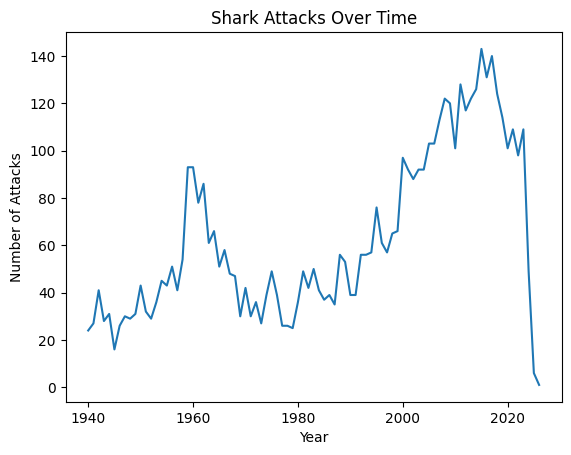

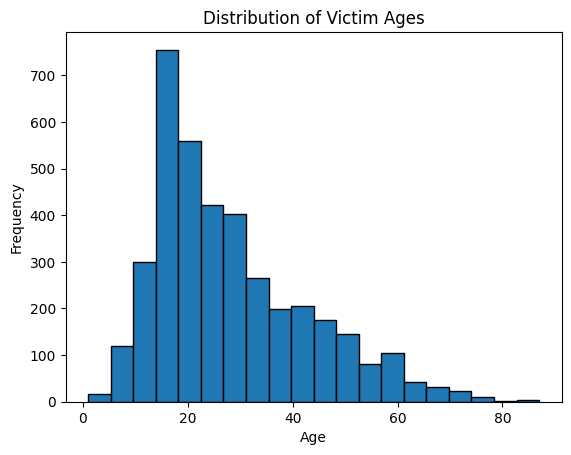

male victims proportion:  0.8027745995423341
proportion of unprovoked attacks:  0.007294050343249428
Sex
F    15
M    36
dtype: int64
Type          Fatal Y/N
 Provoked     F            1.000000
?             n            1.000000
Invalid       UNKNOWN      0.839744
              2017         0.044872
              N            0.038462
              y            0.032051
              M            0.025641
               N           0.019231
Questionable  F            0.972222
              M            0.027778
Sea Disaster  UNKNOWN      0.914634
               N           0.042683
              Y x 2        0.042683
Unprovoked    N            0.607843
              F            0.392157
Watercraft    UNKNOWN      0.782123
              Nq           0.108939
              2017         0.058659
              F            0.030726
               N           0.011173
              M            0.008380
Name: proportion, dtype: float64
Sex    Fatal Y/N
F      UNKNOWN      0.414141
       

In [ ]:
#3
import matplotlib.pyplot as plt
file_path = "GSAF5.xls"
df = pd.read_excel(file_path)

#dropping empty colums that do not contain data:
df = df.dropna(axis=1, how='all')
df.head()

#cleaning year variable:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
year_range = (df['Year'].min(), df['Year'].max())
df_recent = df[df['Year'] >= 1940]
attack_trend = df_recent.groupby('Year').size()
print(attack_trend)
#plotting the attacks over time:
df_recent.groupby('Year').size().plot(title="Shark Attacks Over Time", kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

#cleaning age variable (making it numeric)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].dropna().plot(kind='hist', bins=20, edgecolor='black', title="Distribution of Victim Ages")
plt.xlabel("Age")
plt.show()

#proportion of male victims:
male_proportion = (df['Sex'] == 'M').mean()
print("male victims proportion: ", male_proportion)

#cleaning Type variable (Provoked and Unprovoked and Unknown)
df['Type'] = df['Type'].replace(['Provoked', 'Unprovoked', 'Unknown'], regex=True)
unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print("proportion of unprovoked attacks: ", unprovoked_proportion)

#cleaning Fatal Y/N variable (Y, N, and Unknown)
df['Fatal Y/N'] = df['Fatal Y/N'].replace(['Y', 'N', 'Unknown'], regex=True)


#If sharks are more likely to launch unprovoked attacks on men or women:
unprovoked_gender = df[df['Type'] == 'Unprovoked'].groupby('Sex').size()
print(unprovoked_gender)

#If the attack is more or less likely to be fatal when the attack is provoked or unprovoked:
fatality_by_type = df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True)
print(fatality_by_type)

#Fatality based on male or female:
fatality_by_gender = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True)
print(fatality_by_gender)

#Proportion of attacks by white sharks
white_shark_attacks = df[df['Species '].str.contains('White', na=False)]
proportion_white_shark_attacks = len(white_shark_attacks) / len(df)
print("Proportion of attacks by white sharks: ", proportion_white_shark_attacks)



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1: In the most recent U.S. census, data on race was gathered by people self-identifying by selecting one or more races that pertain to them (White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander). For the first time, the Census allowed expanded write-in responses for people who identify as multiracial or come from a different background that isn’t provided.

2: Data is collected for several reasons, including political representation, resource allocation, and social and economic research. Quality is very important as inaccurate data can lead to underfunding certain communities as well as masking disparities.

3: In terms of what was done well, improving multiracial and ethnic identity representation with the multiple sections and expanded write-ins allows them to capture more detailed backgrounds. Yet there are still aspects that were missing, such as a distinct category for Middle Eastern/North African populations, and it is interesting how there is a separation of race and Hispanic ethnicity. For future large-scale surveys, it would be beneficial to consult with communities to refine categories, especially those that are growing in certain areas. There may also be ways to improve language accessibility.

4: The census inquired about sex by providing two options, male and female. In terms of adjustments, there can be another question for separating sex at birth and gender identity.

5: Some of the main concerns with these characteristics pertain to privacy concerns and how such data could lead to discrimination. This aligns with another concern of data bias and whether cleaning methods may prioritize majority groups versus smaller populations. If there are ever missing values, analysts may drop their data which could again lead to false conclusions. Good practices that can be adopted include preserving original responses, using transparent approaches when handling ambiguous data, and allowing self-identification whenever they can. Bad practices involve enforcing predefined categories that may not reflect respondents’ identities and handling missing values just based on assumptions from other information on the respondent.

6: To begin, there would be an ethical issue with such an algorithm because people should have the right to self-identify and there would be more complications when it comes to multiracial individuals. Furthermore, there have historically been issues with algorithms using historical data that can reflect racist biases. There also seems to be more of a privacy risk since a lot of these details are protected characteristics and can influence the chances of discrimination.
